In [14]:
from data.dataset_builder import RecessionDatasetBuilder

builder = RecessionDatasetBuilder()

data = builder.create_data({
    "Real GDP": 3,
    "Unemployment Rate": 3,
    "Nonfarm Payrolls": 2
}, window=6)

In [15]:
data

,Real GDP (t-2),Real GDP (t-1),Real GDP (t-0),Unemployment Rate (t-2),Unemployment Rate (t-1),Unemployment Rate (t-0),Nonfarm Payrolls (t-1),Nonfarm Payrolls (t-0),Recession
1948-04-01,1.565987,1.506038,1.652377,0.4,0.2,-0.1,0.336829,-0.680348,0
1948-05-01,1.565987,1.506038,1.652377,0.2,-0.1,-0.4,-0.680348,0.939634,0
1948-06-01,1.565987,1.506038,1.652377,-0.1,-0.4,0.1,0.939634,0.531297,1
1948-07-01,1.506038,1.652377,0.574518,-0.4,0.1,0.0,0.531297,0.279789,1
1948-08-01,1.506038,1.652377,0.574518,0.1,0.0,0.3,0.279789,0.039858,1
...,...,...,...,...,...,...,...,...,...
2024-08-01,0.404802,0.738980,0.759510,0.1,0.1,0.0,0.055726,0.044936,0
2024-09-01,0.404802,0.738980,0.759510,0.1,0.0,-0.1,0.044936,0.151828,0
2024-10-01,0.738980,0.759510,0.607065,0.0,-0.1,0.0,0.151828,0.027793,0
2024-11-01,0.738980,0.759510,0.607065,-0.1,0.0,0.1,0.027793,0.164816,0


In [16]:
X = data.drop(columns=["Recession"])
y = data["Recession"]

In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight="balanced", random_state=42)
model.fit(X, y)
probas = model.predict_proba(X)[:, 1]

In [23]:
from sklearn.utils import compute_sample_weight
from sklearn.metrics import average_precision_score, accuracy_score

sample_weights = compute_sample_weight(class_weight="balanced", y=y)

print(average_precision_score(y, probas, sample_weight=sample_weights))
print(accuracy_score(y, probas > 0.5, sample_weight=sample_weights))

0.6748573360933506
0.6154207202594301


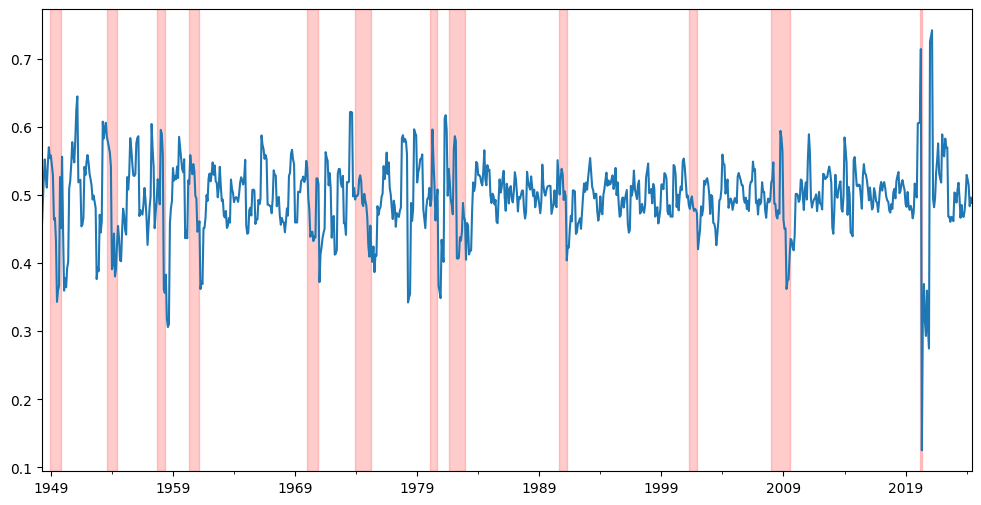

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from data.helpers import get_recessions

plt.figure(figsize=(12, 6))
pd.Series(probas, index=y.index).plot()

for start, end in get_recessions(y.index.min()):
    plt.axvspan(start, end, color="red", alpha=0.2)

plt.show()